In [3]:
import numpy as np
import matplotlib.pylab as plt
import random as rn
import time
from scipy.spatial import ConvexHull
from matplotlib.patches import Rectangle
from matplotlib.path import Path
from mpl_toolkits.mplot3d import Axes3D
import shapely.geometry as geometry
import shapely.ops as so
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from scipy.spatial import KDTree
import json

In [4]:
computationTimeLimit_List = [-1, -0.79166667, -0.58333333,-0.375,-0.16666667,0.04166667,0.25,0.45833333,0.66666667,0.875,1.08333333,1.29166667,1.5,1.70833333,1.91666667,2.125,2.33333333,2.54166667,2.75]

In [5]:
# Import Computation Time Result
with open('1DComparison_compTime.json') as json_file:
    compTime = json.load(json_file)

In [7]:
# Import Computation Time Result
with open('1DComparison_compTimeSuccess.json') as json_file:
    compTimeSuccess = json.load(json_file)

In [9]:
# Import Computation Time Result
with open('1DComparison_pathTime.json') as json_file:
    pathTime = json.load(json_file)

In [12]:
pathDist = {'0': [0, 0, 0], '1': [0, 0, 0], '2': [0, 0, 0], '3': [0, 0, 0], '4': [50.00000000000001, 0, 50.0], '5': [49.99999999999999, 50.0, 50.040467670109045], '6': [49.99999999999999, 50.014356024357056, 51.041924559418014], '7': [49.99999999999999, 50.319595562544194, 50.07344330467464], '8': [50.0, 50.29268804578375, 48.62249727926869], '9': [50.0, 50.2406063624415, 50.465601800908956], '10': [50.0, 50.7392513424595, 49.713562856117484], '11': [50.0, 50.34766737594213, 51.05150458906074], '12': [50.0, 50.754258486231485, 50.8779762482663], '13': [50.0, 50.79562648659232, 50.901128958111975], '14': [50.0, 50.66543692604736, 51.05343205205912], '15': [50.0, 50.91172752686923, 50.962679131480215], '16': [50.0, 50.69455851681987, 51.19636567880533], '17': [50.0, 50.97272225996049, 50.81166782246549], '18': [50.0, 50.612567582009305, 51.32928563480606]}

In [11]:
# Import Computation Time Result
with open('1DComparison_successRate.json') as json_file:
    successRate = json.load(json_file)

In [14]:
print(successRate.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])


In [21]:
computationTimeLimit_List_unlog = []
for j in range(len(computationTimeLimit_List)):
    computationTimeLimit_List_unlog.append(10**computationTimeLimit_List[j])
print(computationTimeLimit_List_unlog)

[0.1, 0.16155980860397004, 0.2610157235716234, 0.4216965034285822, 0.6812920638288514, 1.1006941797003496, 1.7782794100389228, 2.872984811302691, 4.64158886923829, 7.498942093324558, 12.115276493297703, 19.57341796510813, 31.622776601683793, 51.08969735294137, 82.54041916032295, 133.3521432163324, 215.4434673495986, 348.0700615143776, 562.341325190349]


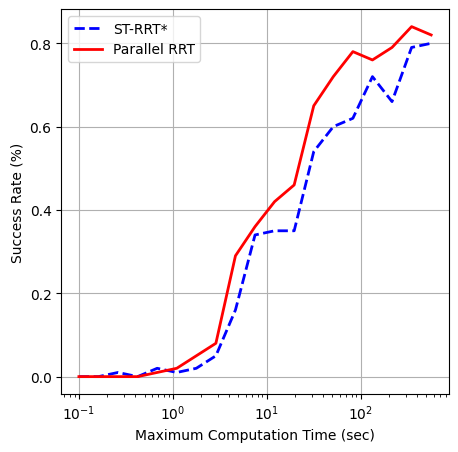

In [29]:
# Plot Success Rate vs CompTimeLimit
successRate_RRTstar_Result = []
successRate_STRRT_Result = []
successRate_RRTP_Result = []
for ii in range(len(list(successRate.keys()))):
    successRate_RRTstar_Result.append(successRate[str(ii)][0])
    successRate_STRRT_Result.append(successRate[str(ii)][1])
    successRate_RRTP_Result.append(successRate[str(ii)][2])

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.subplot(1,1,1)
# plt.plot(computationTimeLimit_List_unlog, successRate_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, successRate_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, successRate_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Success Rate (%)')
# plt.savefig('1DSim02_SuccessRate.png')
plt.savefig('1DSim02_SuccessRate_2comparison.png')

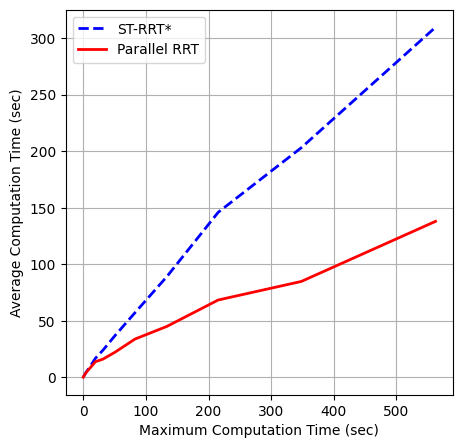

In [37]:
# Plot Average Computation Time vs CompTimeLimit
compTime_RRTstar_Result = []
compTime_STRRT_Result = []
compTime_RRTP_Result = []

for ii in range(len(list(compTime.keys()))):
    compTime_RRTstar_Result.append(compTime[str(ii)][0])
    compTime_STRRT_Result.append(compTime[str(ii)][1])
    compTime_RRTP_Result.append(compTime[str(ii)][2])

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.subplot(1,1,1)
# plt.plot(computationTimeLimit_List_unlog, compTime_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTime_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
# ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
# plt.savefig('1DSim02_ComputatoinTime.png')
# plt.savefig('1DSim02_ComputatoinTime_2comparison.png')

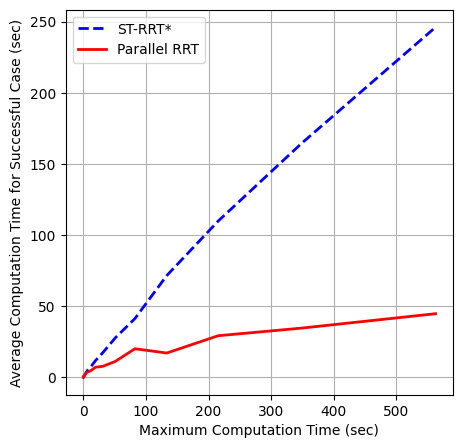

In [42]:
# Plot Average Successful Computation Time vs CompTimeLimit
compTimeSuccess_RRTstar_Result = []
compTimeSuccess_STRRT_Result = []
compTimeSuccess_RRTP_Result = []

for ii in range(len(list(compTimeSuccess.keys()))):
    compTimeSuccess_RRTstar_Result.append(compTimeSuccess[str(ii)][0])
    compTimeSuccess_STRRT_Result.append(compTimeSuccess[str(ii)][1])
    compTimeSuccess_RRTP_Result.append(compTimeSuccess[str(ii)][2])

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.subplot(1,1,1)
# plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
# ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time for Successful Case (sec)')
# plt.savefig('1DSim02_ComputatoinTimeSuccess_log.png')
# plt.savefig('1DSim02_ComputatoinTimeSuccess_2comparison.png')

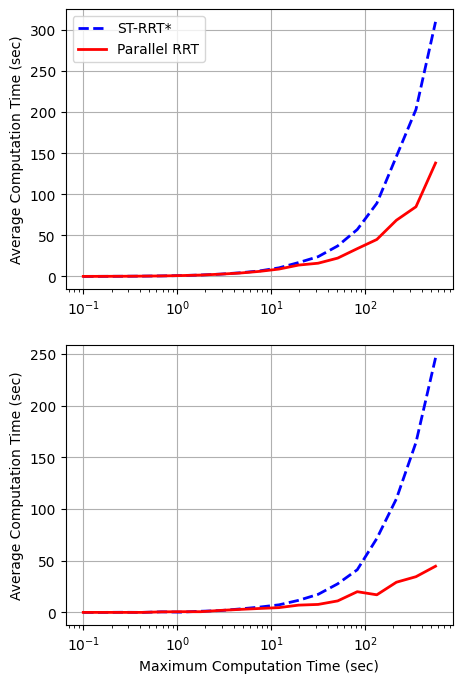

In [45]:
fig = plt.figure(figsize=(5, 8), dpi=100)
ax = plt.subplot(2,1,1)
# plt.plot(computationTimeLimit_List_unlog, compTime_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTime_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
# plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
ax.set_xscale('log')
plt.grid()
plt.legend()
ax = plt.subplot(2,1,2)
# plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_RRTstar_Result, '--g', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_STRRT_Result, '--b', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_RRTP_Result, '-r', linewidth = 2)
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
ax.set_xscale('log')
plt.grid()
# plt.savefig('1DSim02_ComputatoinTimeComparison1_log.png')
plt.savefig('1DSim02_ComputatoinTimeComparison1_log_2comparison.png')

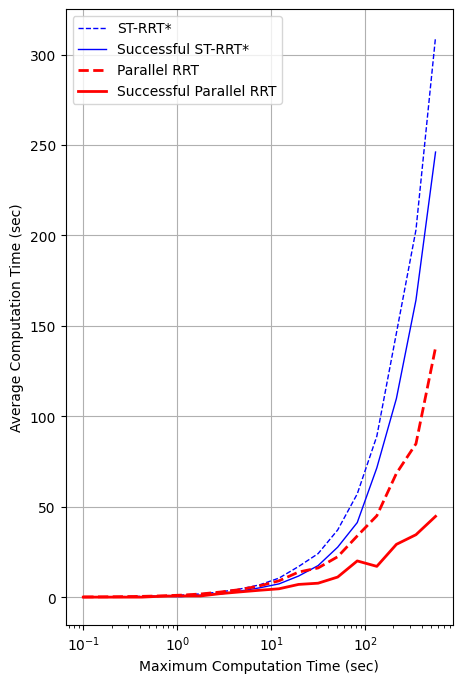

In [49]:
fig = plt.figure(figsize=(5, 8), dpi=100)
ax = plt.subplot(1,1,1)
linewidth_compTime = 1
linewidth_compTimeSucc = 1

# plt.plot(computationTimeLimit_List_unlog, compTime_RRTstar_Result, '--g', label='RRT*', linewidth = linewidth_compTime)
# plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_RRTstar_Result, '-g', label='Successful RRT*', linewidth = linewidth_compTimeSucc)
plt.plot(computationTimeLimit_List_unlog, compTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = linewidth_compTime)
plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_STRRT_Result, '-b', label='Successful ST-RRT*', linewidth = linewidth_compTimeSucc)
plt.plot(computationTimeLimit_List_unlog, compTime_RRTP_Result, '--r', label='Parallel RRT', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, compTimeSuccess_RRTP_Result, '-r', label='Successful Parallel RRT', linewidth = 2)
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Computation Time (sec)')
ax.set_xscale('log')
plt.legend()
plt.grid()
# plt.savefig('1DSim02_ComputatoinTimeComparison2_log.png')
plt.savefig('1DSim02_ComputatoinTimeComparison1_2comparison.png')

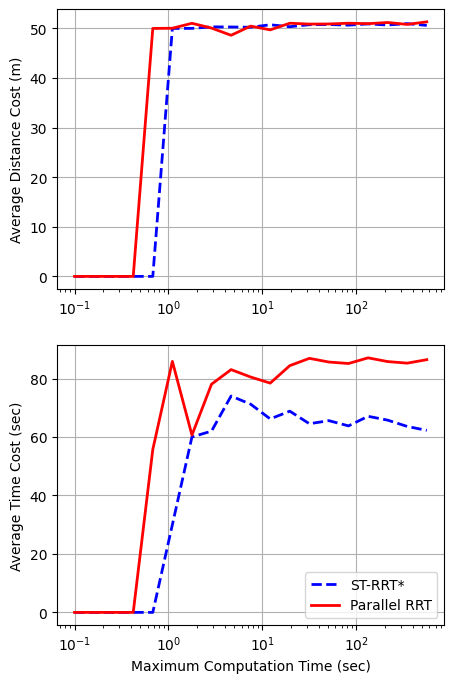

In [54]:
# Plot Distance Cost vs CompTimeLimit
pathDist_RRTstar_Result = []
pathDist_STRRT_Result = []
pathDist_RRTP_Result = []

for ii in range(len(list(pathDist.keys()))):
    pathDist_RRTstar_Result.append(pathDist[str(ii)][0])
    pathDist_STRRT_Result.append(pathDist[str(ii)][1])
    pathDist_RRTP_Result.append(pathDist[str(ii)][2])

# Plot Distance Cost vs CompTimeLimit
pathTime_RRTstar_Result = []
pathTime_STRRT_Result = []
pathTime_RRTP_Result = []

for ii in range(len(list(pathTime.keys()))):
    pathTime_RRTstar_Result.append(pathTime[str(ii)][0])
    pathTime_STRRT_Result.append(pathTime[str(ii)][1])
    pathTime_RRTP_Result.append(pathTime[str(ii)][2])


fig = plt.figure(figsize=(5, 8), dpi=100)
ax = plt.subplot(2,1,1)
# plt.plot(computationTimeLimit_List_unlog, pathDist_RRTstar_Result, '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, pathDist_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, pathDist_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
# plt.legend()
plt.grid()
ax.set_xscale('log')
plt.ylabel('Average Distance Cost (m)')
ax = plt.subplot(2,1,2)
# plt.plot(computationTimeLimit_List_unlog, np.abs(pathTime_RRTstar_Result), '--g', label='RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, pathTime_STRRT_Result, '--b', label='ST-RRT*', linewidth = 2)
plt.plot(computationTimeLimit_List_unlog, pathTime_RRTP_Result, '-r', label='Parallel RRT', linewidth = 2)
plt.legend()
plt.grid()
ax.set_xscale('log')
plt.xlabel('Maximum Computation Time (sec)')
plt.ylabel('Average Time Cost (sec)')
# plt.savefig('1DSim02_Cost_log.png')
plt.savefig('1DSim02_1DSim02_Cost_log_2comparison.png')